In [3]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
from sklearn.decomposition import PCA
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
df = pd.read_csv('../../DATA/USArrests.csv', index_col='rownames')

In [8]:
scaled = StandardScaler().fit_transform(df)

In [13]:
pca = PCA().fit(scaled)

<Axes: >

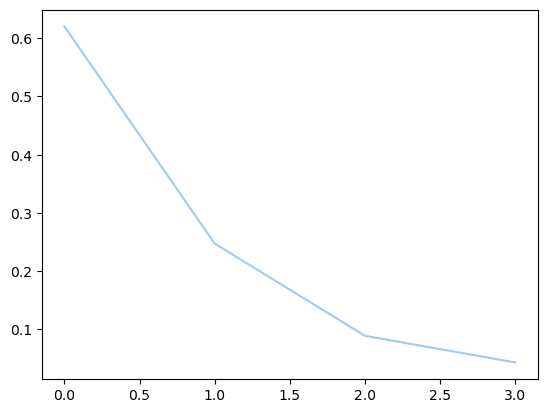

In [16]:
sns.lineplot(pca.explained_variance_ratio_)

In [22]:
loadings = pca.components_

In [65]:
def variance_explained(loading, data):
    n = data.shape[0]
    pve = (1/n) * np.sum([ np.square(np.dot(loading, i)) for i in scaled ])
    total_variance = np.sum(np.square(data))
    return 50*(pve/total_variance)

In [66]:
explained_variance = []
for m in loadings:
    explained_variance.append(variance_explained(m,scaled))

<Axes: >

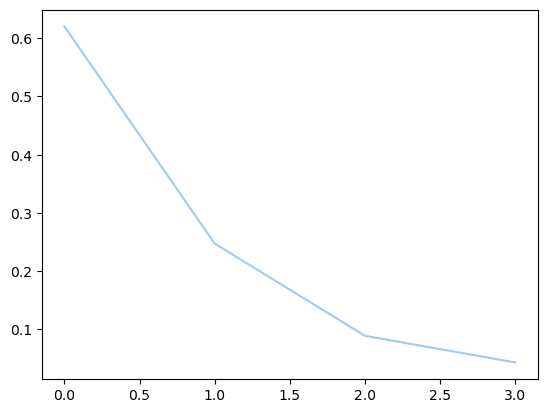

In [67]:
sns.lineplot(explained_variance)